## Introduction

We use statistical analysis on Environmental data to interpret the increasing flood of vast data from environmental areas, which are often of heterogeneous nature and show high variability.We analyse the data collected for many years to notice the significant effects on the environment.Many important results and statements concerning our environment are based on statistical investigations, such as changes of the ozone layer,climate changes etc.

In this notebook, we try to look at the vegetation data collected from 2000 - 2020 and analyse the changes occured significantly

## Problem

With the exponential increase in technology,production and population in the recent years, these impacts on the environment are more significant then ever before.In this post industrial revolution era, to meet the ever-increasing needs of the population, huge industries are set up leading to release of enormous amount of greenhouse gases and non-renewable resources are exploited. We are now in a stage where we can literally taste the climate change.
 
 Though some nations are focusing on curbing deforestation and boosting renewable energy sources,but it takes many years for the whole world to properly implement that considering different status of development in different countries.


At stake are hundreds of millions of lives, innumerable species and ecosystems, the health and viability of the economy, and the future habitability of this planet.

To understand the effects of this,we collect vegetation data from four locations with different climatic conditions- Banglore,Chennai,Mumbai,Delhi which are also provided with  two vegetation indices EVI(Enhanced Vegetation Index)
and NDVI(Normalized Difference Vegetation Index).The data is analysed and tested some hypothesis to reach conclusions regarding impact on the environment over the years.


In [1]:
import geopandas as gpd

In [2]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df_bang = pd.read_csv("24_MOD13A2.006 Terra Vegetation Indices 16-Day Global 1km_Bangalore shapefiles.csv")
df_chennai = pd.read_csv("24_MOD13A2.006 Terra Vegetation Indices 16-Day Global 1km_Chennai shapefiles.csv")
df_delhi = pd.read_csv("24_MOD13A2.006 Terra Vegetation Indices 16-Day Global 1km_Delhi Shape Files.csv")
df_mumbai = pd.read_csv("24_MOD13A2.006 Terra Vegetation Indices 16-Day Global 1km_Mumbai shapefiles.csv")

In [4]:
df_bang.head()

,ASS_CONST1,EVI,NDVI,WARD_NAME,WARD_NO,date
0,Yelahanka,2049.325009,3749.680403,Kempegowda Ward,1.0,2000-02-18T00:00:00
1,Yelahanka,2173.734134,3984.821048,Chowdeswari Ward,2.0,2000-02-18T00:00:00
2,Yelahanka,2013.578811,3544.564853,Atturu,3.0,2000-02-18T00:00:00
3,Yelahanka,2257.561651,3960.141579,Yelahanka Satellite Town,4.0,2000-02-18T00:00:00
4,K.R. Puram,2208.604758,3754.638586,K R Puram,52.0,2000-02-18T00:00:00


In [5]:
df_chennai.head()

,EVI,NDVI,Ward_No,Zone_Name,Zone_No,date
0,2164.736253,3854.939547,0,St. Thomas Mount,-,2000-02-18T00:00:00
1,1828.857560,3793.179848,7,THIRUVOTTIYUR,I,2000-02-18T00:00:00
2,1004.904508,2745.285063,1,THIRUVOTTIYUR,I,2000-02-18T00:00:00
3,910.523639,2238.339073,2,THIRUVOTTIYUR,I,2000-02-18T00:00:00
4,1475.962406,3146.511768,3,THIRUVOTTIYUR,I,2000-02-18T00:00:00


In [6]:
df_delhi.head()

,EVI,NDVI,Ward_Name,Ward_No,date
0,1908.908293,3449.798267,NaN,NaN,2000-02-18T00:00:00
1,1856.574356,3192.695832,PUSA,150,2000-02-18T00:00:00
2,1915.048425,3079.115284,BHATI,176,2000-02-18T00:00:00
3,863.103856,1428.013392,DABRI,129,2000-02-18T00:00:00
4,1439.217421,2396.769225,DEOLI,173,2000-02-18T00:00:00


In [7]:
df_mumbai.head()

,EVI,NDVI,date,gid,name
0,752.675866,1633.026216,2000-02-18T00:00:00,1,A
1,655.656752,1349.610443,2000-02-18T00:00:00,2,B
2,640.692657,1277.904315,2000-02-18T00:00:00,3,C
3,1099.814742,2242.791811,2000-02-18T00:00:00,4,D
4,865.789163,1970.192934,2000-02-18T00:00:00,5,E


In [8]:
df_bang = df_bang.drop(columns=['ASS_CONST1','WARD_NO'])
df_chennai = df_chennai.drop(columns=['Zone_No'])
df_delhi = df_delhi.drop(columns=['Ward_No'])
df_mumbai = df_mumbai.drop(columns=['name'])

In [9]:
df_bang['date']=df_bang['date'].str.split('T').apply(lambda x:x[0])
df_bang['date']=pd.to_datetime(df_bang['date'].str.split('-').apply(lambda x:str(x[0])+'-'+str(x[1])+'-01'))
bang = pd.DataFrame({'ward_name':df_bang['WARD_NAME'],'date':df_bang['date'],'year':df_bang['date'].apply(lambda x:x.year),
                     'month':df_bang['date'].apply(lambda x:x.month),'EVI':df_bang['EVI'],'NDVI':df_bang['NDVI']})

df_chennai['date']=df_chennai['date'].str.split('T').apply(lambda x:x[0])
df_chennai['date']=pd.to_datetime(df_chennai['date'].str.split('-').apply(lambda x:str(x[0])+'-'+str(x[1])+'-01'))
chennai = pd.DataFrame({'zone_name':df_chennai['Zone_Name'],'ward_no':df_chennai['Ward_No'],'date':df_chennai['date'],
                        'year':df_chennai['date'].apply(lambda x:x.year),'month':df_chennai['date'].apply(lambda x:x.month),
                        'EVI':df_chennai['EVI'],'NDVI':df_chennai['NDVI']})

df_delhi['date']=df_delhi['date'].str.split('T').apply(lambda x:x[0])
df_delhi['date']=pd.to_datetime(df_delhi['date'].str.split('-').apply(lambda x:str(x[0])+'-'+str(x[1])+'-01'))
delhi = pd.DataFrame({'ward_name':df_delhi['Ward_Name'],'date':df_delhi['date'],'year':df_delhi['date'].apply(lambda x:x.year),
                      'month':df_delhi['date'].apply(lambda x:x.month),'EVI':df_delhi['EVI'],'NDVI':df_delhi['NDVI']})

df_mumbai['date']=df_mumbai['date'].str.split('T').apply(lambda x:x[0])
df_mumbai['date']=pd.to_datetime(df_mumbai['date'].str.split('-').apply(lambda x:str(x[0])+'-'+str(x[1])+'-01'))
mumbai = pd.DataFrame({'gid':df_mumbai['gid'],'date':df_mumbai['date'],'year':df_mumbai['date'].apply(lambda x:x.year),
                       'month':df_mumbai['date'].apply(lambda x:x.month),'EVI':df_mumbai['EVI'],'NDVI':df_mumbai['NDVI']})

In [10]:
bang.head()

,ward_name,date,year,month,EVI,NDVI
0,Kempegowda Ward,2000-02-01,2000,2,2049.325009,3749.680403
1,Chowdeswari Ward,2000-02-01,2000,2,2173.734134,3984.821048
2,Atturu,2000-02-01,2000,2,2013.578811,3544.564853
3,Yelahanka Satellite Town,2000-02-01,2000,2,2257.561651,3960.141579
4,K R Puram,2000-02-01,2000,2,2208.604758,3754.638586


In [11]:
chennai.head()

,zone_name,ward_no,date,year,month,EVI,NDVI
0,St. Thomas Mount,0,2000-02-01,2000,2,2164.736253,3854.939547
1,THIRUVOTTIYUR,7,2000-02-01,2000,2,1828.857560,3793.179848
2,THIRUVOTTIYUR,1,2000-02-01,2000,2,1004.904508,2745.285063
3,THIRUVOTTIYUR,2,2000-02-01,2000,2,910.523639,2238.339073
4,THIRUVOTTIYUR,3,2000-02-01,2000,2,1475.962406,3146.511768


In [12]:
delhi.head()

,ward_name,date,year,month,EVI,NDVI
0,NaN,2000-02-01,2000,2,1908.908293,3449.798267
1,PUSA,2000-02-01,2000,2,1856.574356,3192.695832
2,BHATI,2000-02-01,2000,2,1915.048425,3079.115284
3,DABRI,2000-02-01,2000,2,863.103856,1428.013392
4,DEOLI,2000-02-01,2000,2,1439.217421,2396.769225


In [13]:
mumbai.head()

,gid,date,year,month,EVI,NDVI
0,1,2000-02-01,2000,2,752.675866,1633.026216
1,2,2000-02-01,2000,2,655.656752,1349.610443
2,3,2000-02-01,2000,2,640.692657,1277.904315
3,4,2000-02-01,2000,2,1099.814742,2242.791811
4,5,2000-02-01,2000,2,865.789163,1970.192934


# Bangalore

In [14]:
bang.describe()

,year,month,EVI,NDVI
count,93654.000000,93654.000000,93654.000000,93654.000000
mean,2009.915433,6.306554,1914.065569,2970.221320
std,5.943141,3.405197,616.990825,933.827348
min,2000.000000,1.000000,136.494969,133.538906
25%,2005.000000,3.000000,1485.506925,2432.899733
50%,2010.000000,6.000000,1825.111394,2924.579551
75%,2015.000000,9.000000,2270.626904,3523.960840
max,2020.000000,12.000000,4687.778787,6703.098209


In [15]:
bang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93654 entries, 0 to 93653
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ward_name  93654 non-null  object        
 1   date       93654 non-null  datetime64[ns]
 2   year       93654 non-null  int64         
 3   month      93654 non-null  int64         
 4   EVI        93654 non-null  float64       
 5   NDVI       93654 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 4.3+ MB


In [16]:
bang.ward_name.nunique()

198

In [17]:
bang_mean_monthly = bang.groupby('date').mean()
bang_mean_monthly.reset_index(inplace=True)

In [18]:
bang_mean_monthly.head()

,date,year,month,EVI,NDVI
0,2000-02-01,2000,2,1841.286259,3170.631568
1,2000-03-01,2000,3,1987.458657,3133.192418
2,2000-04-01,2000,4,2032.155539,3264.212161
3,2000-05-01,2000,5,2424.859653,3465.048153
4,2000-06-01,2000,6,2663.616580,3813.603514


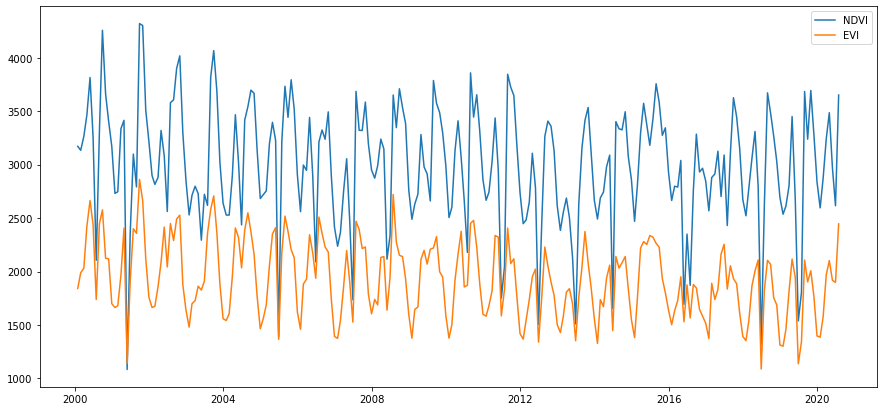

In [19]:
plt.figure(figsize=(15,7))
plt.plot(bang_mean_monthly['date'],bang_mean_monthly['NDVI'])
plt.plot(bang_mean_monthly['date'],bang_mean_monthly['EVI'])
plt.legend(['NDVI','EVI'])

* This graph illustrates the monthly changes in the vegetative index in Banglore over the span of 20 years.
* We can see similar patterns from one year to the other. This is due to seasonal changes.
* The general trend for the vegetation index is it increases till September(peak) and again falls down lowest being January.  

In [20]:
bang_mean_yearly = bang.groupby('year').mean()
bang_mean_yearly.reset_index(inplace=True)

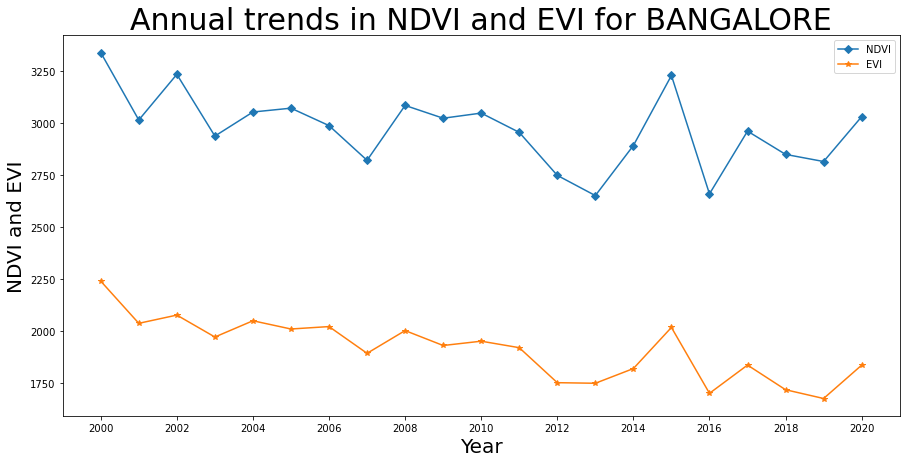

In [21]:
plt.figure(figsize=(15,7))
plt.plot(bang_mean_yearly['year'],bang_mean_yearly['NDVI'],marker='D')
plt.plot(bang_mean_yearly['year'],bang_mean_yearly['EVI'],marker='*')
plt.title("Annual trends in NDVI and EVI for BANGALORE",fontdict={"fontsize":30})
plt.xlabel("Year",fontdict={"fontsize":20})
plt.ylabel("NDVI and EVI",fontdict={"fontsize":20})
plt.legend(['NDVI','EVI'])
plt.xticks([i for i in range(2000,2021,2)]);

* This graph illustrates the yearly trend of vegetative index in Bangalore from 2000 to 2020.
* As we can see there is decrease in the vegetative index in 2020 when compared from 2000.
* There is a sudden decrease in 2015 due to the exploitation of green lands by the industries.
* In 2014, a study revealed that 'Silicon valley of India' aka Bangalore has only 1 tree for every 7 persons.

<AxesSubplot:>

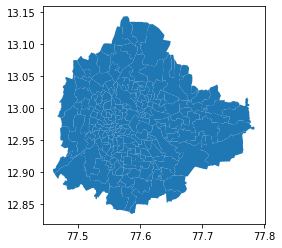

In [22]:
bang_map = gpd.read_file('BBMP-polygon.shp')
bang_map.plot()

In [23]:
bang_ward = bang.groupby('ward_name').mean()
bang_ward.drop(['year','month'],axis=1,inplace=True)
bang_wardmap = bang_map.merge(bang_ward,left_on='WARD_NAME',right_index=True)

<AxesSubplot:title={'center':'EVI'}>

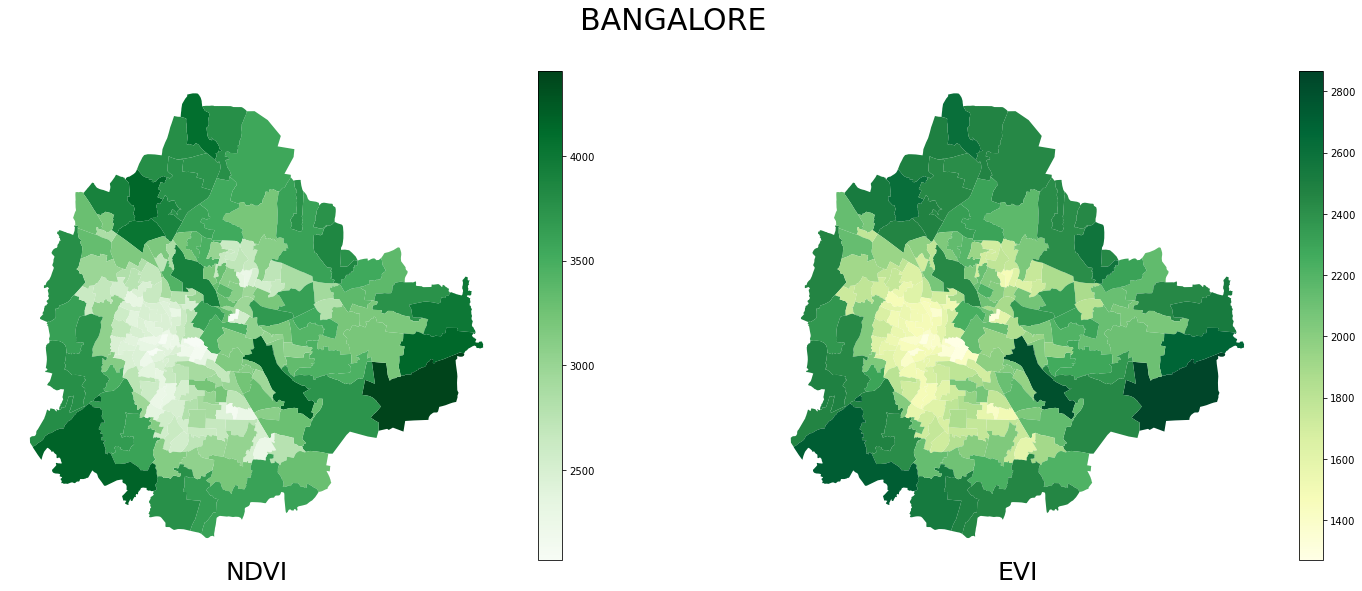

In [24]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(25,9))
fig.suptitle('BANGALORE',fontsize=30,fontweight=5)

ax[0].axis('off')
ax[0].set_title('NDVI',fontdict={'fontsize': '25', 'fontweight' : '2'},y=-0.05)
cmin = bang_wardmap['NDVI'].min()
cmax = bang_wardmap['NDVI'].max()
cb = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=cmin,vmax=cmax))
cb.set_array([])
fig.colorbar(cb,ax=ax[0])
bang_wardmap.plot(column='NDVI',ax=ax[0],cmap='Greens')

ax[1].axis('off')
ax[1].set_title('EVI',fontdict={'fontsize': '25', 'fontweight' : '2'},y=-0.05)
cmin = bang_wardmap['EVI'].min()
cmax = bang_wardmap['EVI'].max()
cb = plt.cm.ScalarMappable(cmap='YlGn', norm=plt.Normalize(vmin=cmin,vmax=cmax))
cb.set_array([])
fig.colorbar(cb,ax=ax[1])
bang_wardmap.plot(column='EVI',ax=ax[1],cmap='YlGn')

* 

<AxesSubplot:xlabel='year', ylabel='NDVI'>

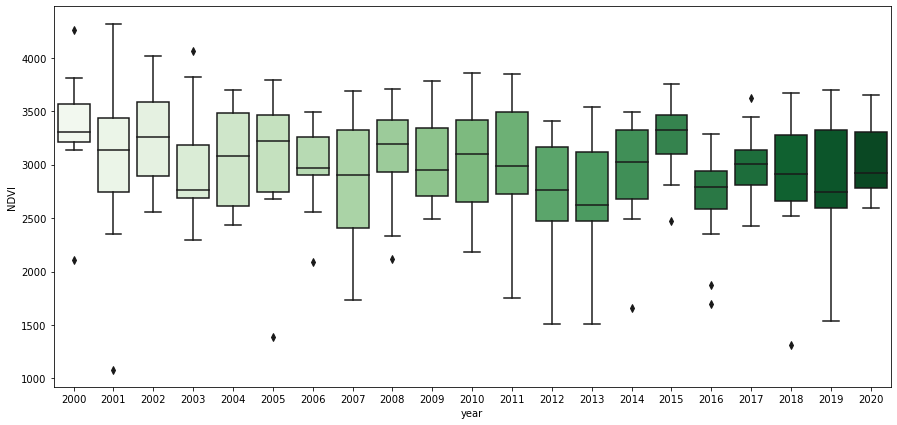

In [25]:
plt.figure(figsize=(15,7))
sns.boxplot(x='year',y='NDVI',data=bang_mean_monthly,palette='Greens')

<AxesSubplot:xlabel='year', ylabel='EVI'>

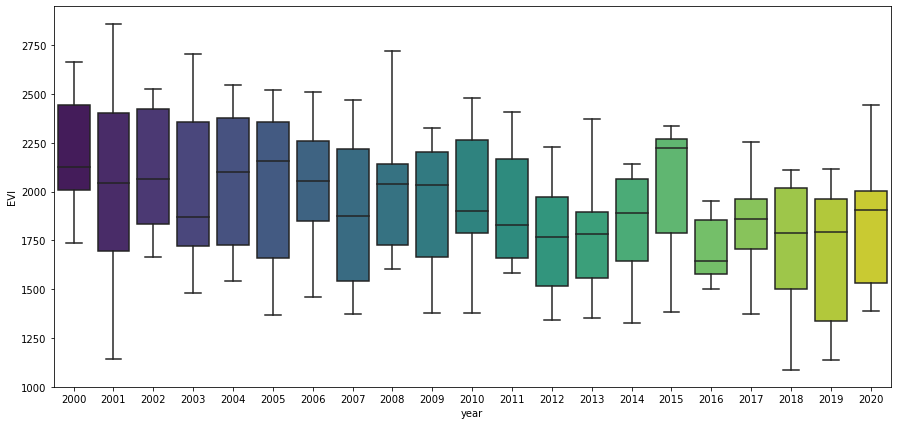

In [26]:
plt.figure(figsize=(15,7))
sns.boxplot(x='year',y='EVI',data=bang_mean_monthly,palette='viridis')

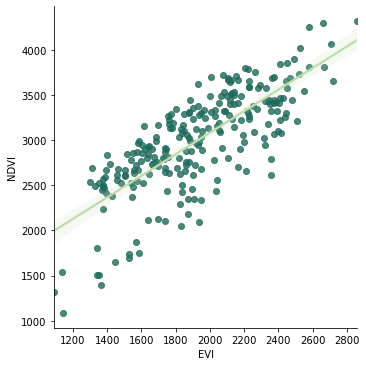

In [27]:
sns.lmplot(x='EVI',y='NDVI',data=bang_mean_monthly,line_kws={'color': '#bfdcae'},scatter_kws={'color': '#206a5d'})

### Bar graphs infer that Vegetation is decreased when compared with 2000s in Bangalore city

---

# Chennai

In [28]:
chennai.describe()

,ward_no,year,month,EVI,NDVI
count,95073.000000,95073.000000,95073.000000,95073.000000,95073.000000
mean,100.000000,2009.915433,6.306554,2024.647402,3422.980795
std,58.023289,5.943140,3.405197,562.838420,837.973585
min,0.000000,2000.000000,1.000000,-17.678233,-13.037260
25%,50.000000,2005.000000,3.000000,1650.214528,2882.445706
50%,100.000000,2010.000000,6.000000,1971.172741,3363.371532
75%,150.000000,2015.000000,9.000000,2345.388969,3918.669756
max,200.000000,2020.000000,12.000000,5163.437121,6993.280441


In [29]:
chennai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95073 entries, 0 to 95072
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   zone_name  95073 non-null  object        
 1   ward_no    95073 non-null  int64         
 2   date       95073 non-null  datetime64[ns]
 3   year       95073 non-null  int64         
 4   month      95073 non-null  int64         
 5   EVI        95073 non-null  float64       
 6   NDVI       95073 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 5.1+ MB


In [30]:
chennai_mean_monthly = chennai.groupby('date').mean()
chennai_mean_monthly.reset_index(inplace=True)

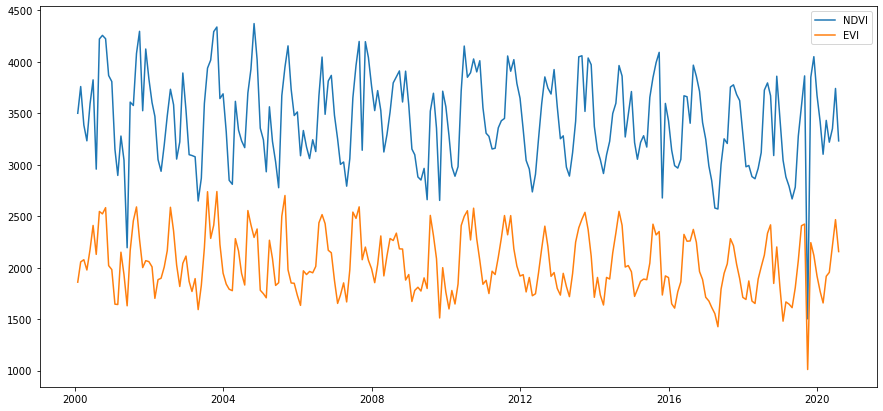

In [31]:
plt.figure(figsize=(15,7))
plt.plot(chennai_mean_monthly['date'],chennai_mean_monthly['NDVI'])
plt.plot(chennai_mean_monthly['date'],chennai_mean_monthly['EVI'])
plt.legend(['NDVI','EVI'])

* This graph illustrates the monthly changes in the vegetative index in Chennai over the span of 20 years.
* We can see similar patterns from one year to the other. This is due to seasonal changes.
* The general pattern for the vegetation index is its at lowest around February and increases till October(peak) and again  decreases, but being near to sea,floods and cyclones make a huge impact.
* There is a major dip in the NDVI,EDI at the end of 2019.
* This is due to a major heat wave in India from May to June 2019 resulted in huge rain deficit

In [32]:
chennai_mean_yearly = chennai.groupby('year').mean()
chennai_mean_yearly.reset_index(inplace=True)

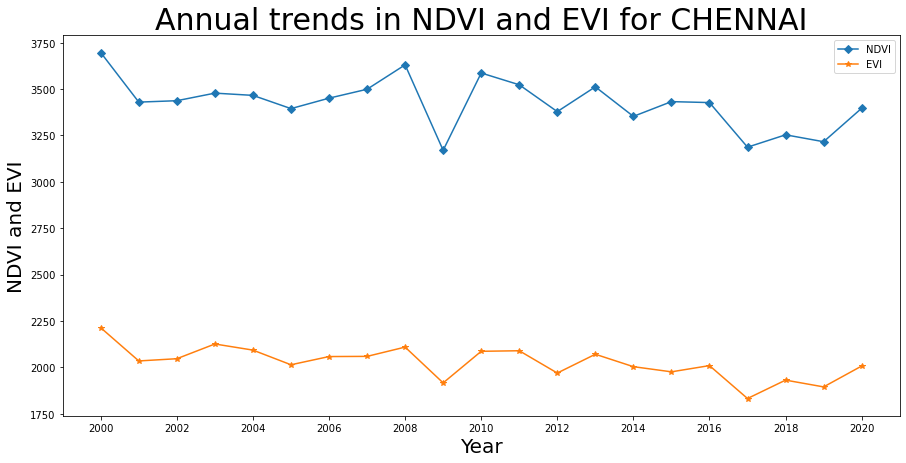

In [33]:
plt.figure(figsize=(15,7))
plt.plot(chennai_mean_yearly['year'],chennai_mean_yearly['NDVI'],marker='D')
plt.plot(chennai_mean_yearly['year'],chennai_mean_yearly['EVI'],marker='*')
plt.title("Annual trends in NDVI and EVI for CHENNAI",fontdict={"fontsize":30})
plt.xlabel("Year",fontdict={"fontsize":20})
plt.ylabel("NDVI and EVI",fontdict={"fontsize":20})
plt.legend(['NDVI','EVI'])
plt.xticks([i for i in range(2000,2021,2)]);

+ This graph illustrates the yearly trend of vegetative index in Chennai from 2000 to 2020.
+ There has been a decrease in vegetative indices from 2000 to 2020 but not as large as Banglore.
+ There is less variabilty in vegetation index in general( for Chennai), possible reason is it being a coastal city  
+ ## **There is a huge dip in NDVI,EVI in the year 2009 can be considered as an after effect of [Cyclone Nisha(November 2008)](https://en.wikipedia.org/wiki/Cyclone_Nisha_(2008))**
- > ### Vegetation is washed away due to cyclone

<AxesSubplot:>

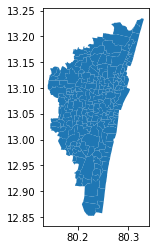

In [34]:
chennai_map = gpd.read_file('Wards-polygon.shp')
chennai_map.plot()

In [35]:
chennai_ward = chennai.groupby('ward_no').mean()
chennai_ward.drop(['year','month'],axis=1,inplace=True)
chennai_wardmap = chennai_map.merge(chennai_ward,left_on='Ward_No',right_index=True)

<AxesSubplot:title={'center':'EVI'}>

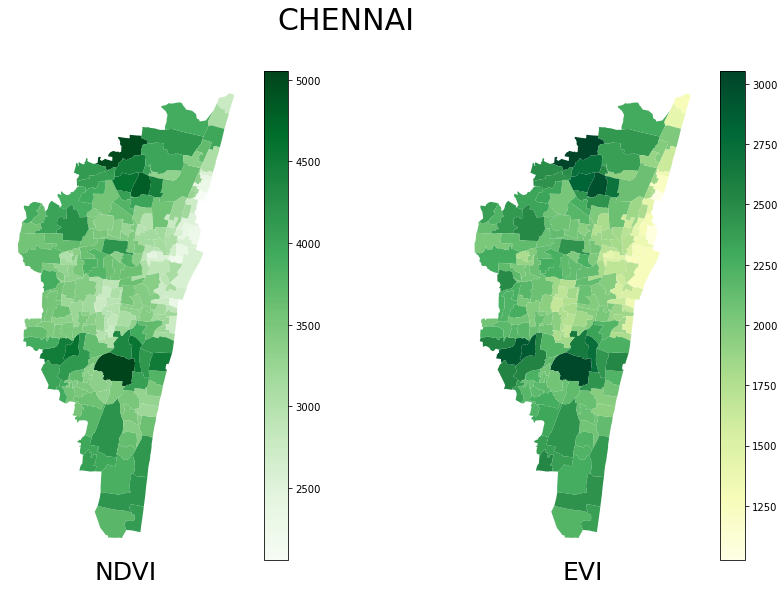

In [36]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,9))
fig.suptitle('CHENNAI',fontsize=30,fontweight=5)

ax[0].axis('off')
ax[0].set_title('NDVI',fontdict={'fontsize': '25', 'fontweight' : '2'},y=-0.05)
cmin = chennai_wardmap['NDVI'].min()
cmax = chennai_wardmap['NDVI'].max()
cb = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=cmin,vmax=cmax))
cb.set_array([])
fig.colorbar(cb,ax=ax[0])
chennai_wardmap.plot(column='NDVI',ax=ax[0],cmap='Greens')

ax[1].axis('off')
ax[1].set_title('EVI',fontdict={'fontsize': '25', 'fontweight' : '2'},y=-0.05)
cmin = chennai_wardmap['EVI'].min()
cmax = chennai_wardmap['EVI'].max()
cb = plt.cm.ScalarMappable(cmap='YlGn', norm=plt.Normalize(vmin=cmin,vmax=cmax))
cb.set_array([])
fig.colorbar(cb,ax=ax[1])
chennai_wardmap.plot(column='EVI',ax=ax[1],cmap='YlGn')

<AxesSubplot:xlabel='year', ylabel='NDVI'>

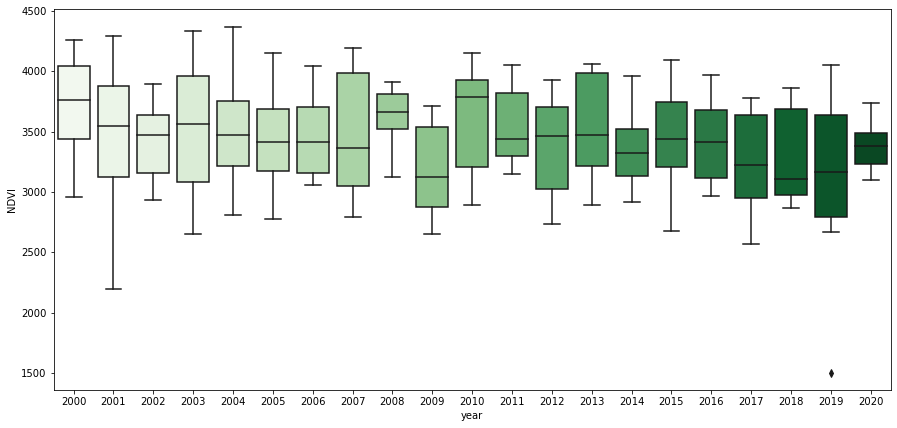

In [37]:
plt.figure(figsize=(15,7))
sns.boxplot(x='year',y='NDVI',data=chennai_mean_monthly,palette='Greens')

<AxesSubplot:xlabel='year', ylabel='EVI'>

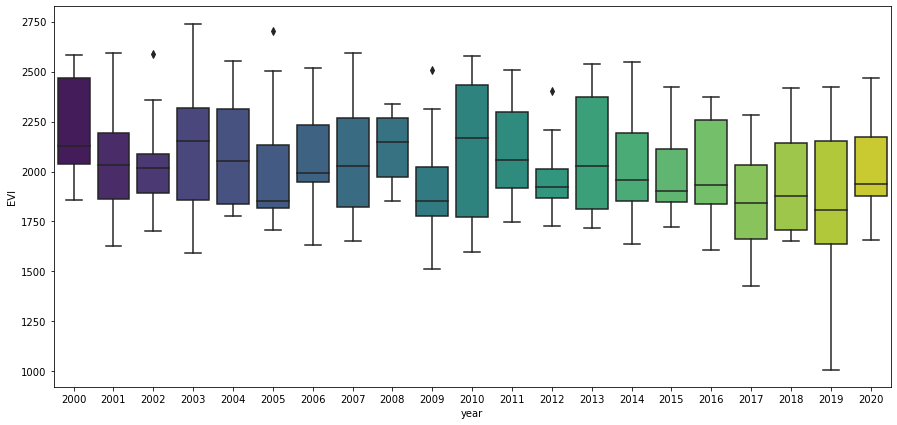

In [38]:
plt.figure(figsize=(15,7))
sns.boxplot(x='year',y='EVI',data=chennai_mean_monthly,palette='viridis')

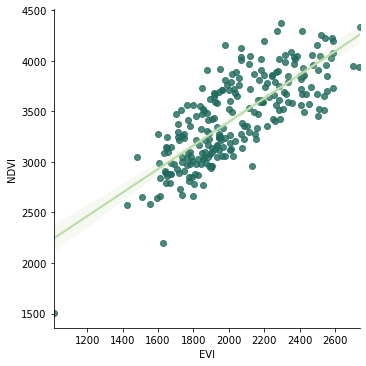

In [39]:
sns.lmplot(x='EVI',y='NDVI',data=chennai_mean_monthly,line_kws={'color': '#bfdcae'},scatter_kws={'color': '#206a5d'})

### Bar graphs shows that there is a dip in vegetation compared to 2000s but in recent years its stabilised

---

# Delhi

In [40]:
delhi.describe()

,year,month,EVI,NDVI
count,137170.000000,137170.000000,137170.000000,137170.000000
mean,2009.915433,6.306554,1558.693546,2522.256578
std,5.943131,3.405191,683.944621,992.738234
min,2000.000000,1.000000,-330.636072,-329.658818
25%,2005.000000,3.000000,1073.558776,1817.994670
50%,2010.000000,6.000000,1425.476807,2361.920928
75%,2015.000000,9.000000,1895.614307,3068.052351
max,2020.000000,12.000000,5715.741797,7677.885927


In [41]:
delhi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137170 entries, 0 to 137169
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   ward_name  136697 non-null  object        
 1   date       137170 non-null  datetime64[ns]
 2   year       137170 non-null  int64         
 3   month      137170 non-null  int64         
 4   EVI        137170 non-null  float64       
 5   NDVI       137170 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 6.3+ MB


In [42]:
delhi_mean_monthly = delhi.groupby('date').mean()
delhi_mean_monthly.reset_index(inplace=True)

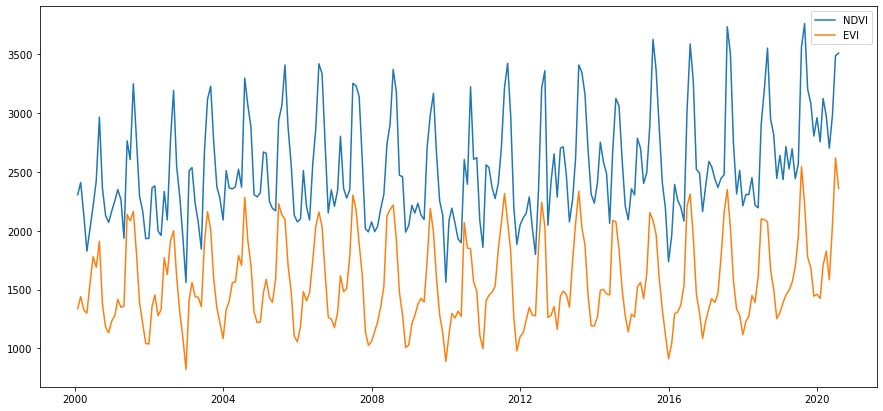

In [43]:
plt.figure(figsize=(15,7))
plt.plot(delhi_mean_monthly['date'],delhi_mean_monthly['NDVI'])
plt.plot(delhi_mean_monthly['date'],delhi_mean_monthly['EVI'])
plt.legend(['NDVI','EVI'])

* This graph illustrates the monthly changes in the vegetative index in Delhi over the span of 20 years.
* We can see similar patterns from one year to the other. This is due to seasonal changes.
* Lying in Northern plains,its climate is impacted by the Himalayas and Thar Desert leading to extreme shifts in vegetation 
* Vegetation is low in winter and attains its peak around July-August in monsoon and decreases again post-autumn season  

In [44]:
delhi_mean_yearly = delhi.groupby('year').mean()
delhi_mean_yearly.reset_index(inplace=True)

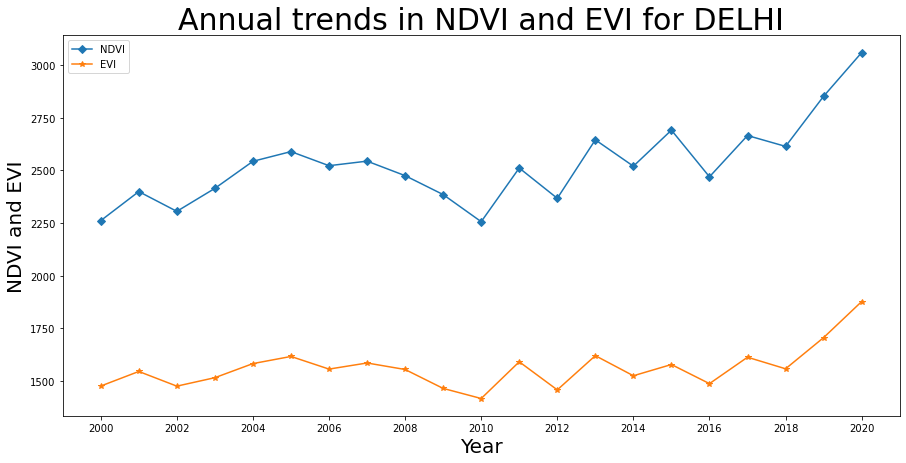

In [45]:
plt.figure(figsize=(15,7))
plt.plot(delhi_mean_yearly['year'],delhi_mean_yearly['NDVI'],marker='D')
plt.plot(delhi_mean_yearly['year'],delhi_mean_yearly['EVI'],marker='*')
plt.title("Annual trends in NDVI and EVI for DELHI",fontdict={"fontsize":30})
plt.xlabel("Year",fontdict={"fontsize":20})
plt.ylabel("NDVI and EVI",fontdict={"fontsize":20})
plt.legend(['NDVI','EVI'])
plt.xticks([i for i in range(2000,2021,2)]);

+ This graph illustrates the yearly trend of vegetative index in Delhi from 2000 to 2020.
+ There has been a huge increase in vegetation from 2000 to 2020 
+ The dip in vegetation in 2010 majorly due to Northern Hemisphere heat waves which recorded one of the highest temperatures
  in India cause from El Niño event 
+ Major [increase of vegatation](https://www-knocksense-com.cdn.ampproject.org/v/s/www.knocksense.com/amp/forest-cover-in-delhi-doubles-up-seeing-a-115-rise-in-the-past-19-years-2644920393?usqp=mq331AQFKAGwASA%3D&amp_js_v=0.1#aoh=16057225365732&referrer=https%3A%2F%2Fwww.google.com&amp_tf=From%20%251%24s&ampshare=https%3A%2F%2Fwww.knocksense.com%2Fdelhi%2Fforest-cover-in-delhi-doubles-up-seeing-a-115-rise-in-the-past-19-years) began in 2018 can be accounted due to many mega plantation drives launched with the help of DDA
   in order to fight the high air pollution in Delhi

<AxesSubplot:>

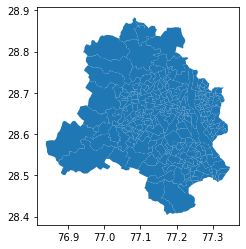

In [46]:
delhi_map = gpd.read_file('Delhi_Wards-polygon.shp')
delhi_map.plot()

In [47]:
delhi_ward = delhi.dropna().groupby('ward_name').mean()
delhi_ward.drop(['year','month'],axis=1,inplace=True)
delhi_wardmap = delhi_map.merge(delhi_ward,left_on='Ward_Name',right_index=True)

<AxesSubplot:title={'center':'EVI'}>

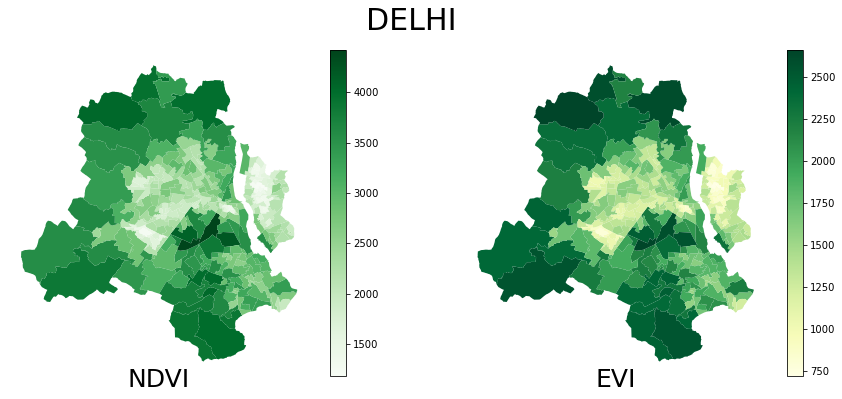

In [48]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
fig.suptitle('DELHI',fontsize=30,fontweight=5)

ax[0].axis('off')
ax[0].set_title('NDVI',fontdict={'fontsize': '25', 'fontweight' : '2'},y=-0.05)
cmin = delhi_wardmap['NDVI'].min()
cmax = delhi_wardmap['NDVI'].max()
cb = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=cmin,vmax=cmax))
cb.set_array([])
fig.colorbar(cb,ax=ax[0])
delhi_wardmap.plot(column='NDVI',ax=ax[0],cmap='Greens')

ax[1].axis('off')
ax[1].set_title('EVI',fontdict={'fontsize': '25', 'fontweight' : '2'},y=-0.05)
cmin = delhi_wardmap['EVI'].min()
cmax = delhi_wardmap['EVI'].max()
cb = plt.cm.ScalarMappable(cmap='YlGn', norm=plt.Normalize(vmin=cmin,vmax=cmax))
cb.set_array([])
fig.colorbar(cb,ax=ax[1])
delhi_wardmap.plot(column='EVI',ax=ax[1],cmap='YlGn')

<AxesSubplot:xlabel='year', ylabel='NDVI'>

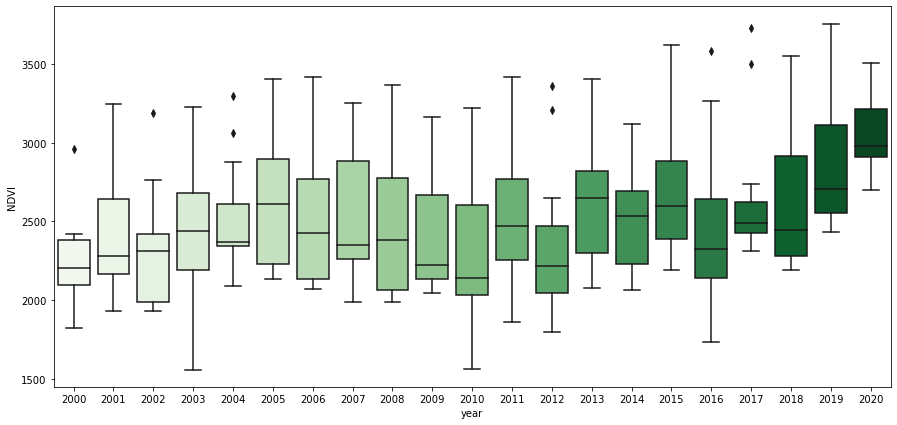

In [49]:
plt.figure(figsize=(15,7))
sns.boxplot(x='year',y='NDVI',data=delhi_mean_monthly,palette='Greens')

<AxesSubplot:xlabel='year', ylabel='EVI'>

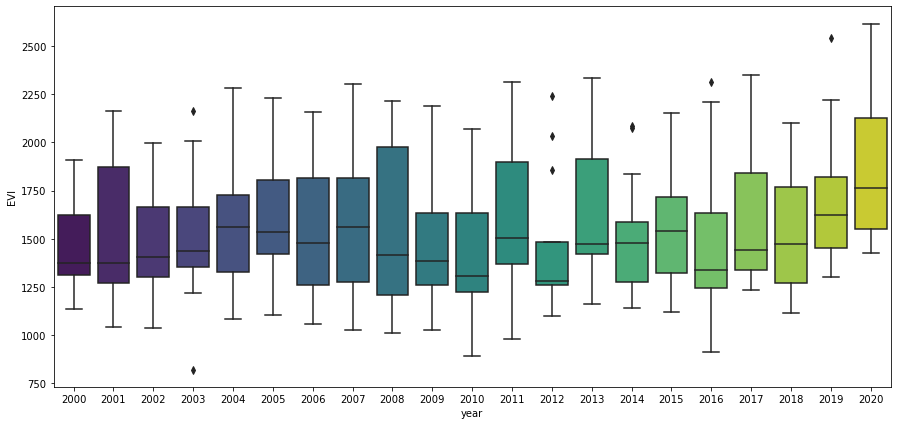

In [50]:
plt.figure(figsize=(15,7))
sns.boxplot(x='year',y='EVI',data=delhi_mean_monthly,palette='viridis')

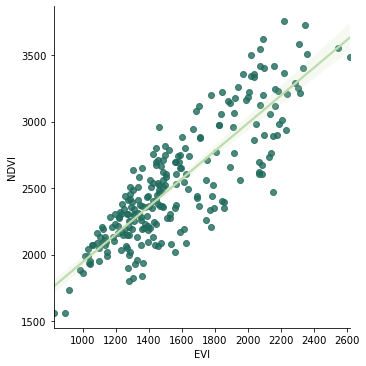

In [51]:
sns.lmplot(x='EVI',y='NDVI',data=delhi_mean_monthly,line_kws={'color': '#bfdcae'},scatter_kws={'color': '#206a5d'})

### Bar graph shows that vegetation has increased when compared to 2000s in Delhi. Thanks to planting programs and revolutionary moves. 

---

# Mumbai

In [52]:
mumbai.describe()

,gid,year,month,EVI,NDVI
count,11352.000000,11352.000000,11352.000000,11352.000000,11352.000000
mean,12.500000,2009.915433,6.306554,1690.319862,2996.201712
std,6.922491,5.943371,3.405329,688.045854,1217.944383
min,1.000000,2000.000000,1.000000,-195.884446,-179.201961
25%,6.750000,2005.000000,3.000000,1232.309604,2268.281775
50%,12.500000,2010.000000,6.000000,1610.082198,2903.037904
75%,18.250000,2015.000000,9.000000,2076.752157,3728.411620
max,24.000000,2020.000000,12.000000,4334.270324,7267.922167


In [53]:
mumbai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11352 entries, 0 to 11351
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   gid     11352 non-null  int64         
 1   date    11352 non-null  datetime64[ns]
 2   year    11352 non-null  int64         
 3   month   11352 non-null  int64         
 4   EVI     11352 non-null  float64       
 5   NDVI    11352 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 532.2 KB


In [54]:
mumbai_mean_monthly = mumbai.groupby('date').mean()
mumbai_mean_monthly.reset_index(inplace=True)

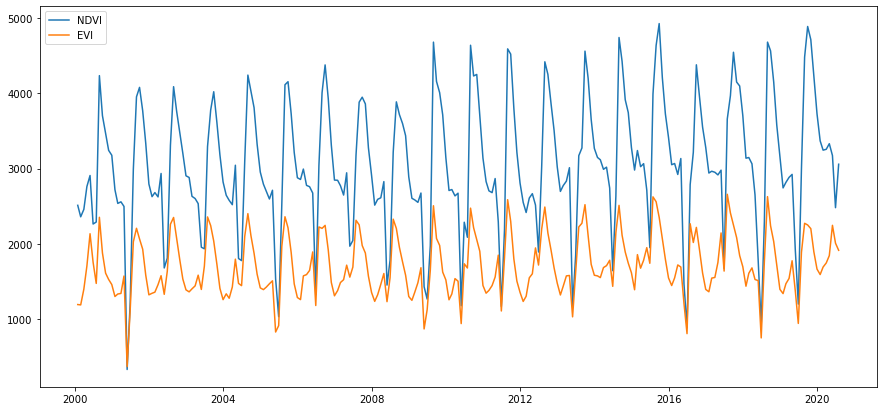

In [55]:
plt.figure(figsize=(15,7))
plt.plot(mumbai_mean_monthly['date'],mumbai_mean_monthly['NDVI'])
plt.plot(mumbai_mean_monthly['date'],mumbai_mean_monthly['EVI'])
plt.legend(['NDVI','EVI'])

* This graph illustrates the monthly changes in the vegetative index in Mumbai over the span of 20 years.
* We can see similar patterns from one year to the other. This is due to seasonal changes.
* Mumbai being a coastal city is moderately hot with high level of humidity.
* Though the temperature fluctuations are very low, the significant changes in relative humidities result govern the pattern of vegetation.
* It reaches its peak around June-August and immediately falls and reaches minimum in winter around February.

In [56]:
mumbai_mean_yearly = mumbai.groupby('year').mean()
mumbai_mean_yearly.reset_index(inplace=True)

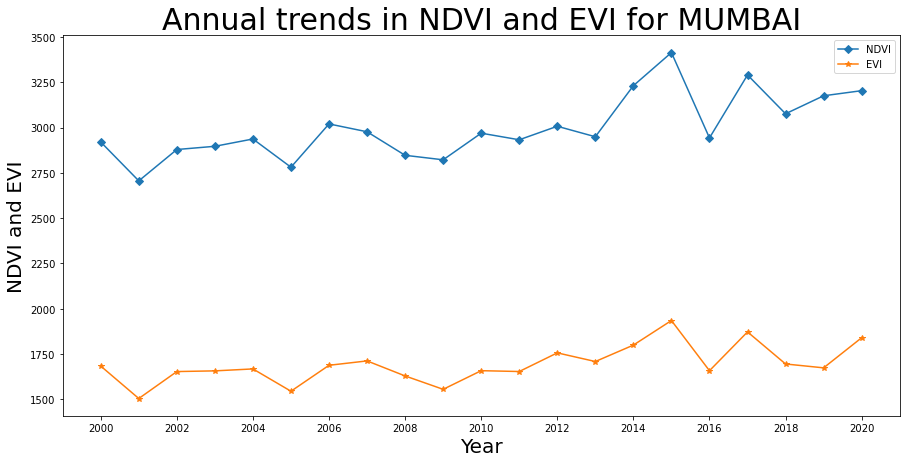

In [57]:
plt.figure(figsize=(15,7))
plt.plot(mumbai_mean_yearly['year'],mumbai_mean_yearly['NDVI'],marker='D')
plt.plot(mumbai_mean_yearly['year'],mumbai_mean_yearly['EVI'],marker='*')
plt.title("Annual trends in NDVI and EVI for MUMBAI",fontdict={"fontsize":30})
plt.xlabel("Year",fontdict={"fontsize":20})
plt.ylabel("NDVI and EVI",fontdict={"fontsize":20})
plt.legend(['NDVI','EVI'])
plt.xticks([i for i in range(2000,2021,2)]);

+ This graph illustrates the yearly trend of vegetative index in Mumbai from 2000 to 2020.
+ There has been a significant increase in vegetation from 2000 to 2020 
+ There is less variability in vegetation index in general( for Mumbai), possible reason is it being a coastal city and also    
  majorly because of protection of Sanjay Gandhi National Park  
+ Decrease in the vegetation in 2005 is due to [Mumbai floods(July 2005)](https://www.unitedwaymumbai.org/view-impact-31) 
+ The major dip in the plot around 2016 could be due to ever increasing [urbanization of the city](https://www.hindustantimes.com/mumbai-news/40-years-of-development-cost-mumbai-60-of-its-green-cover-65-of-water-bodies-study/story-ySgLLxkoNbBALP3u28X9TI.html)

<AxesSubplot:>

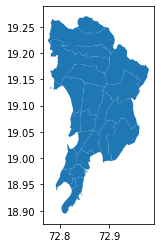

In [58]:
mumbai_map = gpd.read_file('BMC_Wards-polygon.shp')
mumbai_map.plot()

In [59]:
mumbai_ward = mumbai.groupby('gid').mean()
mumbai_ward.drop(['year','month'],axis=1,inplace=True)
mumbai_wardmap = mumbai_map.merge(mumbai_ward,left_on='gid',right_index=True)

<AxesSubplot:title={'center':'EVI'}>

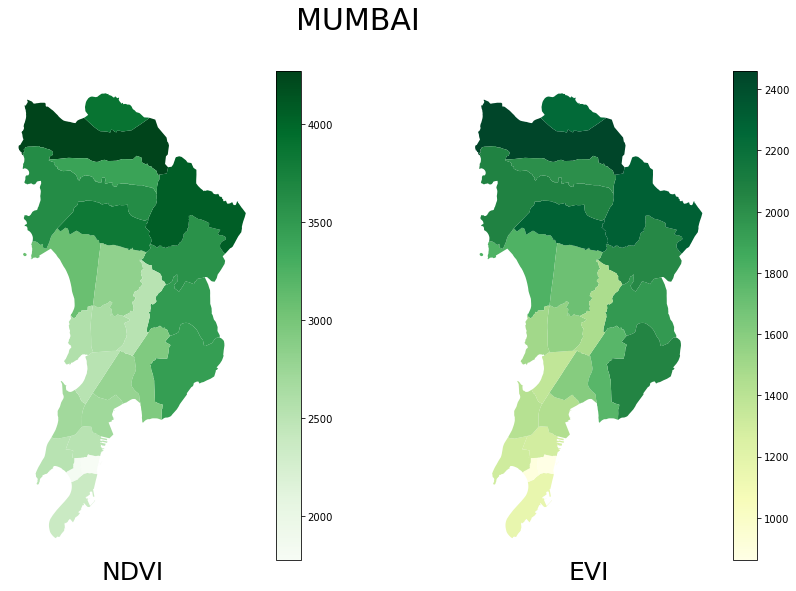

In [60]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,9))
fig.suptitle('MUMBAI',fontsize=30,fontweight=5)

ax[0].axis('off')
ax[0].set_title('NDVI',fontdict={'fontsize': '25', 'fontweight' : '2'},y=-0.05)
cmin = mumbai_wardmap['NDVI'].min()
cmax = mumbai_wardmap['NDVI'].max()
cb = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=cmin,vmax=cmax))
cb.set_array([])
fig.colorbar(cb,ax=ax[0])
mumbai_wardmap.plot(column='NDVI',ax=ax[0],cmap='Greens')

ax[1].axis('off')
ax[1].set_title('EVI',fontdict={'fontsize': '25', 'fontweight' : '2'},y=-0.05)
cmin = mumbai_wardmap['EVI'].min()
cmax = mumbai_wardmap['EVI'].max()
cb = plt.cm.ScalarMappable(cmap='YlGn', norm=plt.Normalize(vmin=cmin,vmax=cmax))
cb.set_array([])
fig.colorbar(cb,ax=ax[1])
mumbai_wardmap.plot(column='EVI',ax=ax[1],cmap='YlGn')

<AxesSubplot:xlabel='year', ylabel='NDVI'>

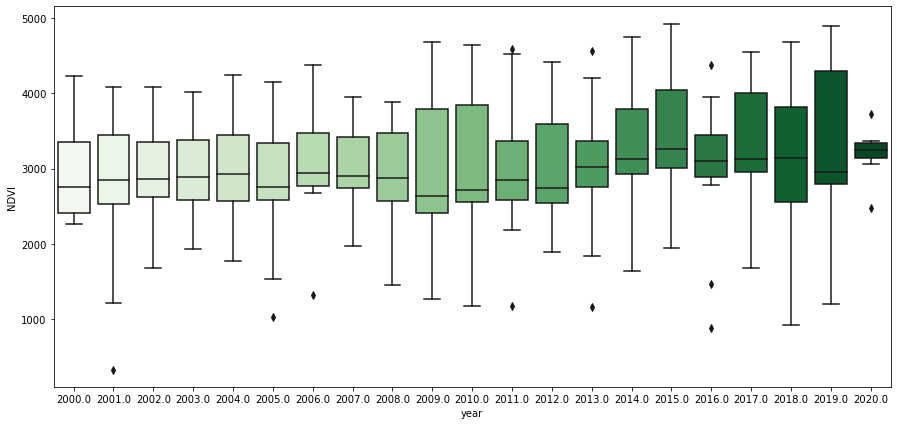

In [61]:
plt.figure(figsize=(15,7))
sns.boxplot(x='year',y='NDVI',data=mumbai_mean_monthly,palette='Greens')

<AxesSubplot:xlabel='year', ylabel='EVI'>

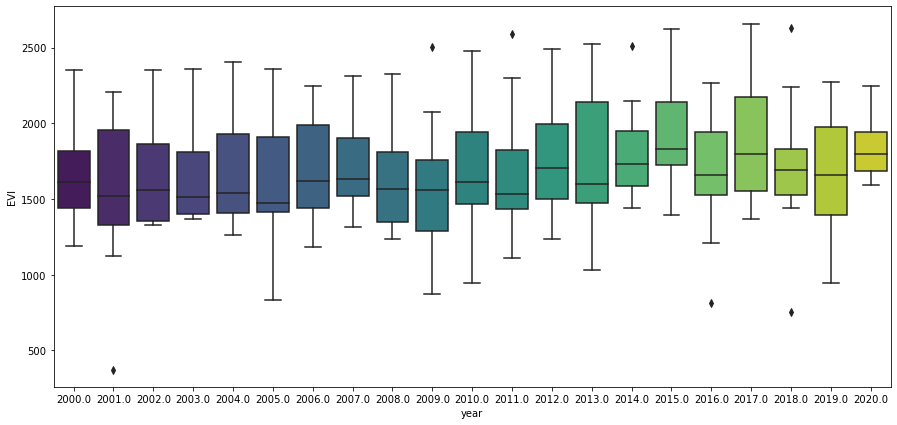

In [62]:
plt.figure(figsize=(15,7))
sns.boxplot(x='year',y='EVI',data=mumbai_mean_monthly,palette='viridis')

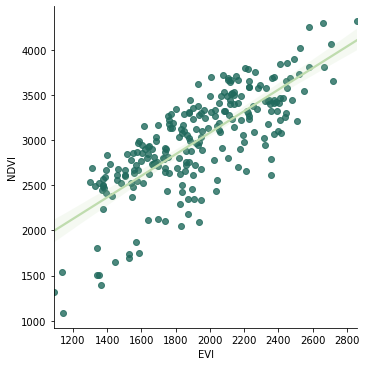

In [63]:
sns.lmplot(x='EVI',y='NDVI',data=bang_mean_monthly,line_kws={'color': '#bfdcae'},scatter_kws={'color': '#206a5d'})

### Bar graphs show that vegetation change is constant in Mumbai

---

# India

<AxesSubplot:>

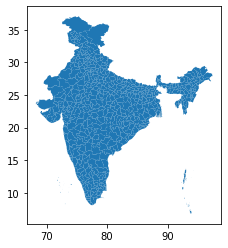

In [64]:
india_map = gpd.read_file('2001_Dist.shp')
india_map.plot()

In [65]:
india_ndvi = pd.read_csv('Landsat_ndvi_2001_weekl.csv')

In [66]:
india_ndvi.head()

,S.No.,DISTRICT,DT_CEN_CD,ST_CEN_CD,ST_NM,date,mean
0,1,Chandigarh,1,4,Chandigarh,2001-01-01T00:00:00,0.206043
1,2,Data Not Available,99,99,Jammu and Kashmir,2001-01-01T00:00:00,0.016797
2,3,Anantnag,6,1,Jammu and Kashmir,2001-01-01T00:00:00,0.040989
3,4,Badgam,4,1,Jammu and Kashmir,2001-01-01T00:00:00,0.079289
4,5,Baramula,2,1,Jammu and Kashmir,2001-01-01T00:00:00,0.083400


In [67]:
india_ndvi['date'] = pd.to_datetime(india_ndvi['date'])
india_ndvi['year'] = india_ndvi['date'].apply(lambda x: x.year)

india_ndvi.head()

,S.No.,DISTRICT,DT_CEN_CD,ST_CEN_CD,ST_NM,date,mean,year
0,1,Chandigarh,1,4,Chandigarh,2001-01-01,0.206043,2001
1,2,Data Not Available,99,99,Jammu and Kashmir,2001-01-01,0.016797,2001
2,3,Anantnag,6,1,Jammu and Kashmir,2001-01-01,0.040989,2001
3,4,Badgam,4,1,Jammu and Kashmir,2001-01-01,0.079289,2001
4,5,Baramula,2,1,Jammu and Kashmir,2001-01-01,0.083400,2001


In [68]:
india_ndvi_annual = india_ndvi.groupby("year").mean().reset_index().drop(columns=['S.No.','DT_CEN_CD','ST_CEN_CD'])
india_ndvi_annual.head()

,year,mean
0,2001,0.281809
1,2002,0.277228
2,2003,0.272727
3,2004,0.270249
4,2005,0.269641


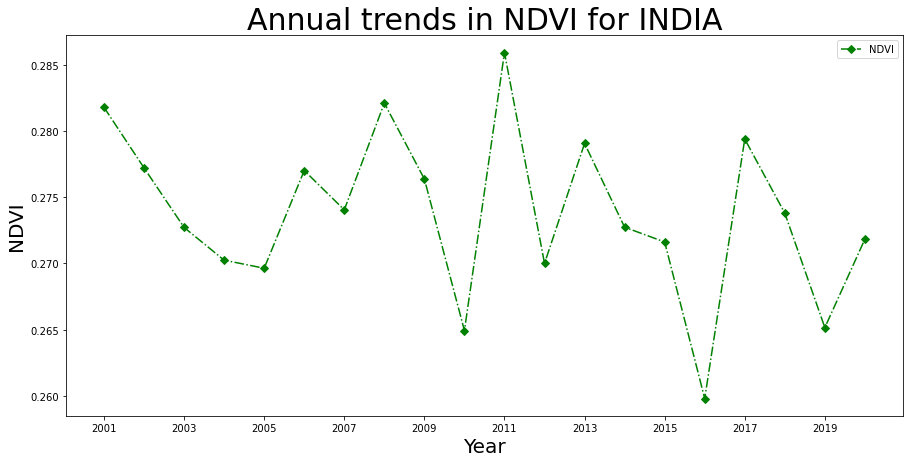

In [69]:
plt.figure(figsize=(15,7))
plt.plot(india_ndvi_annual['year'],india_ndvi_annual['mean'],marker='D',color='Green',linestyle='-.')
plt.legend(['NDVI'])
plt.title("Annual trends in NDVI for INDIA",fontdict={"fontsize":30})
plt.xlabel("Year",fontdict={"fontsize":20})
plt.ylabel("NDVI",fontdict={"fontsize":20})
plt.xticks([i for i in range(2001,2021,2)]);

In [70]:
india_2001 = india_ndvi[india_ndvi['year'] == 2001][['DISTRICT','mean']]
india_2019 = india_ndvi[india_ndvi['year'] == 2019][['DISTRICT','mean']]

india_2001 = india_2001.groupby('DISTRICT').mean()
india_2019 = india_2019.groupby('DISTRICT').mean()

In [71]:
india_distmap_2001 = india_map.merge(india_2001,left_on='DISTRICT',right_index=True)
india_distmap_2019 = india_map.merge(india_2019,left_on='DISTRICT',right_index=True)

<AxesSubplot:title={'center':'2019'}>

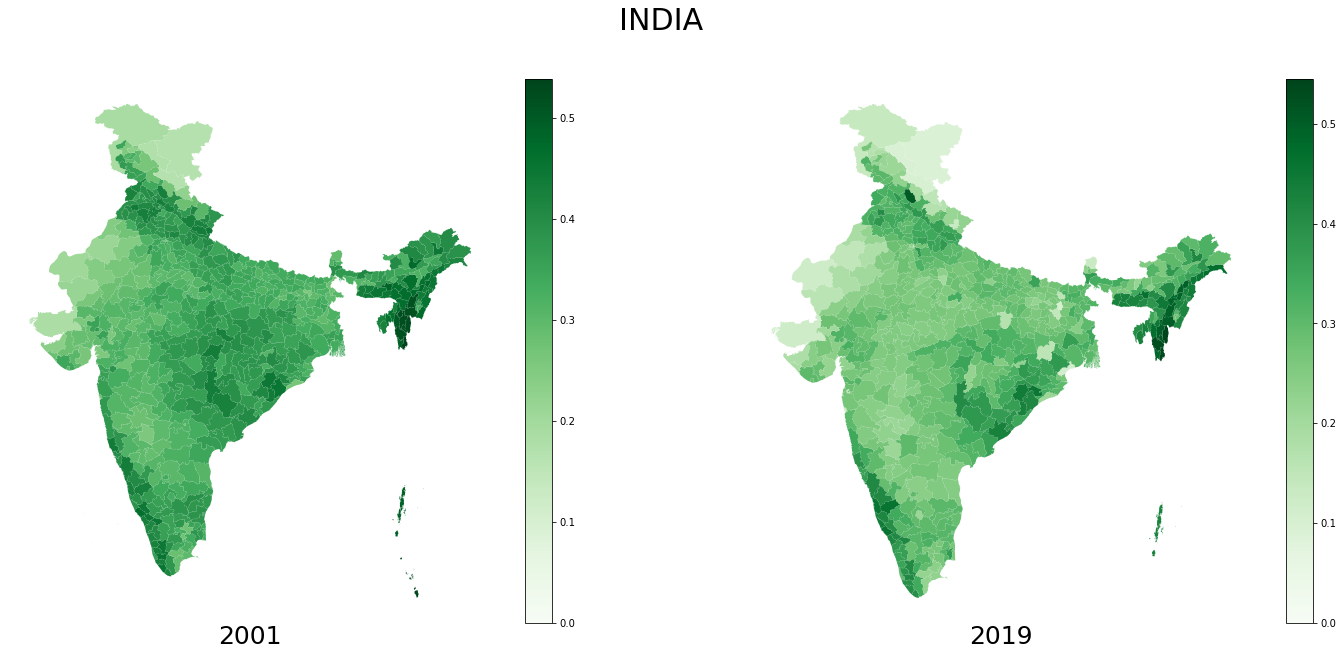

In [72]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(25,10))
fig.suptitle('INDIA',fontsize=30,fontweight=5)

ax[0].axis('off')
ax[0].set_title('2001',fontdict={'fontsize': '25', 'fontweight' : '2'},y=-0.05)
cmin = 0
cmax = india_distmap_2001['mean'].max()
cb = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=cmin,vmax=cmax))
cb.set_array([])
fig.colorbar(cb,ax=ax[0])
india_distmap_2001.plot(column='mean',ax=ax[0],cmap='Greens')

ax[1].axis('off')
ax[1].set_title('2019',fontdict={'fontsize': '25', 'fontweight' : '2'},y=-0.05)
cmin = 0
cmax = india_distmap_2019['mean'].max()
cb = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=cmin,vmax=cmax))
cb.set_array([])
fig.colorbar(cb,ax=ax[1])
india_distmap_2019.plot(column='mean',ax=ax[1],cmap='Greens')

## Its clearly visible that India in 2019 has less greenery when compared to India in 2001

## Some parts of India has lush greenery in 2019 when compared to 2001. Thanks to Government introduced policies and plantation drives

Note: For concrete and conclusive results, referred LANDSAT dataset

---

# Data - Driven Story

## What is NDVI?

- > ### The Normalized Difference Vegetation Index is a simple indicator of photosynthetically active biomass or, in layman’s terms, a calculation of vegetation health.

## What does it show?

- > ### NDVI helps to differentiate vegetation from other types of land cover (artificial) and determine its overall state. It also allows to define and visualize vegetated areas on the map as well as detect abnormal changes in the growth process.

## WHAT NDVI VALUE REPRESENTS HEALTHY VEGETATION?

In [73]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://eos.com/wp-content/uploads/2020/07/plants.jpg", width=1000, height=800)

## HOW TO MEASURE DENSITY OF VEGETATION WITH NDVI?

- > ### NDVI values below 0.2 correspond to scarce vegetation;<br><br> between 0.2 and 0.4 correspond to areas with sparse vegetation;<br><br> moderate vegetation tends to vary between 0.4 and 0.6;<br><br> anything above 0.6 indicates the highest possible density of green leaves.

## Note: In MOD13A2.006 Terra Vegetation Indices 16-Day Global 1km dataset NDVI values are multiplied by 1000

## What is EVI?

- > ### The Enhanced Vegetation Index was invented by Liu and Huete to simultaneously correct NDVI results for atmospheric influences and soil background signals, especially in areas of dense canopy.

## WHAT EVI VALUES REPRESENT HEALTHY VEGETATION?

- > ###  The value range for EVI is -1 to 1, and for healthy vegetation it varies between 0.2 and 0.8.

## Note: In MOD13A2.006 Terra Vegetation Indices 16-Day Global 1km dataset EVI values are multiplied by 100000

## When to use EVI?

- > ### For analyzing areas of Earth with large amounts of chlorophyll (such as rainforests), and preferably with minimum topographic effects (not mountainous regions).

---

# Inferences from Exploratory Data Analysis

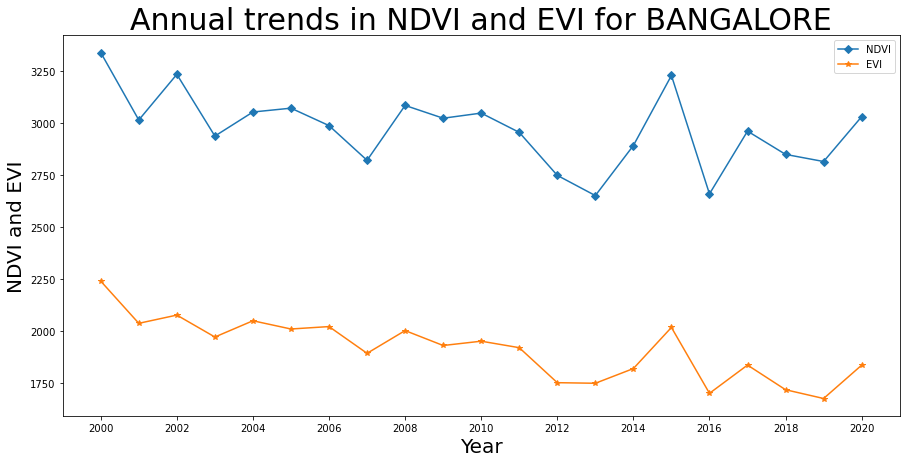

In [74]:
plt.figure(figsize=(15,7))
plt.plot(bang_mean_yearly['year'],bang_mean_yearly['NDVI'],marker='D')
plt.plot(bang_mean_yearly['year'],bang_mean_yearly['EVI'],marker='*')
plt.title("Annual trends in NDVI and EVI for BANGALORE",fontdict={"fontsize":30})
plt.xlabel("Year",fontdict={"fontsize":20})
plt.ylabel("NDVI and EVI",fontdict={"fontsize":20})
plt.legend(['NDVI','EVI'])
plt.xticks([i for i in range(2000,2021,2)]);

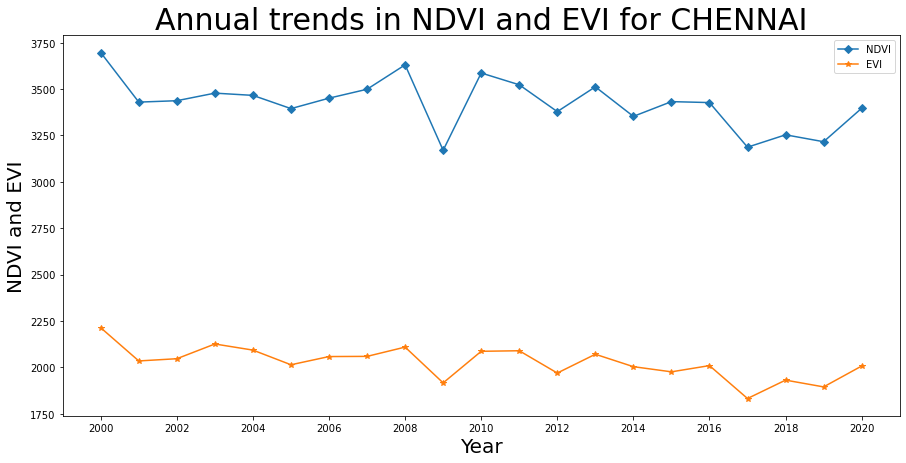

In [75]:
plt.figure(figsize=(15,7))
plt.plot(chennai_mean_yearly['year'],chennai_mean_yearly['NDVI'],marker='D')
plt.plot(chennai_mean_yearly['year'],chennai_mean_yearly['EVI'],marker='*')
plt.title("Annual trends in NDVI and EVI for CHENNAI",fontdict={"fontsize":30})
plt.xlabel("Year",fontdict={"fontsize":20})
plt.ylabel("NDVI and EVI",fontdict={"fontsize":20})
plt.legend(['NDVI','EVI'])
plt.xticks([i for i in range(2000,2021,2)]);

- > ### From Annual EVI and NDVI graphs of Bangalore and Chennai it is evident that there is a huge dip in vegetation

---

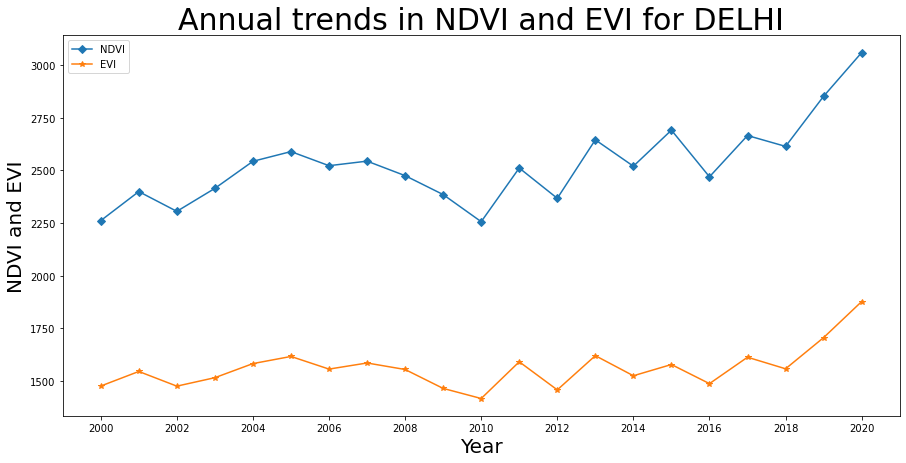

In [76]:
plt.figure(figsize=(15,7))
plt.plot(delhi_mean_yearly['year'],delhi_mean_yearly['NDVI'],marker='D')
plt.plot(delhi_mean_yearly['year'],delhi_mean_yearly['EVI'],marker='*')
plt.title("Annual trends in NDVI and EVI for DELHI",fontdict={"fontsize":30})
plt.xlabel("Year",fontdict={"fontsize":20})
plt.ylabel("NDVI and EVI",fontdict={"fontsize":20})
plt.legend(['NDVI','EVI'])
plt.xticks([i for i in range(2000,2021,2)]);

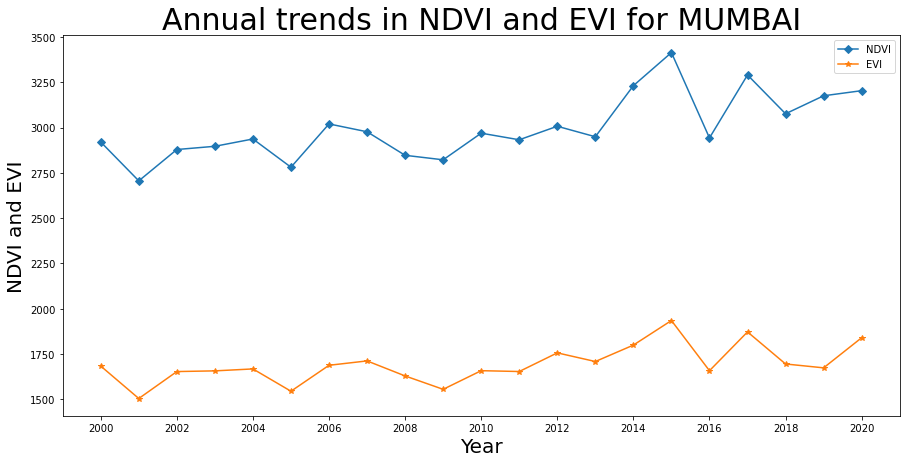

In [77]:
plt.figure(figsize=(15,7))
plt.plot(mumbai_mean_yearly['year'],mumbai_mean_yearly['NDVI'],marker='D')
plt.plot(mumbai_mean_yearly['year'],mumbai_mean_yearly['EVI'],marker='*')
plt.title("Annual trends in NDVI and EVI for MUMBAI",fontdict={"fontsize":30})
plt.xlabel("Year",fontdict={"fontsize":20})
plt.ylabel("NDVI and EVI",fontdict={"fontsize":20})
plt.legend(['NDVI','EVI'])
plt.xticks([i for i in range(2000,2021,2)]);

- > ### From Annual EVI and NDVI graphs of Delhi and Mumbai there is increase in the vegetation 

### Reasons being

- > ### To tackle with air pollution, Delhi government has taken neccessary steps and conducted huge plantation drives which contribute towards vegetation

Source: https://www-knocksense-com.cdn.ampproject.org/v/s/www.knocksense.com/amp/forest-cover-in-delhi-doubles-up-seeing-a-115-rise-in-the-past-19-years-2644920393?usqp=mq331AQFKAGwASA%3D&amp_js_v=0.1#aoh=16057225365732&referrer=https%3A%2F%2Fwww.google.com&amp_tf=From%20%251%24s&ampshare=https%3A%2F%2Fwww.knocksense.com%2Fdelhi%2Fforest-cover-in-delhi-doubles-up-seeing-a-115-rise-in-the-past-19-years

- > ### Strong conservative methods being taken in Mumbai to protect its parks and forests although urbanisation has its share in reducing vegetation in 2015s

---

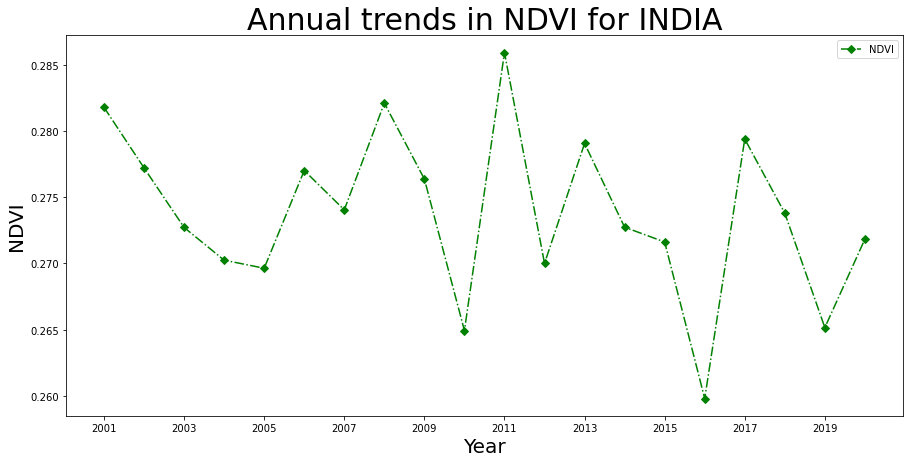

In [78]:
plt.figure(figsize=(15,7))
plt.plot(india_ndvi_annual['year'],india_ndvi_annual['mean'],marker='D',color='Green',linestyle='-.')
plt.legend(['NDVI'])
plt.title("Annual trends in NDVI for INDIA",fontdict={"fontsize":30})
plt.xlabel("Year",fontdict={"fontsize":20})
plt.ylabel("NDVI",fontdict={"fontsize":20})
plt.xticks([i for i in range(2001,2021,2)]);

# From ANNUAL NDVI graph for INDIA, from the decreased values of NDVI, it is clearly evident that Vegetation of INDIA has taken a worse hit 

---

# How climate change effect vegetation?

- > ### The effect of climate change on vegetation is expected due to changes in the temperature, rainfall, and climate pattern as a result of which nutrient cycles, microbial activities, as well as physiological activities of plants will vary. 

- > ### Changes in precipitation may change moisture regimes. Soil erosion, salinity, acidity, and other physical and chemical factors may be affected as well. All these factors are closely related to vegetation growth. 

- > ### For example, with global temperature projected to rise to 3°C by the year 2030, this could cause the height of the sea level to rise by 0.8–1.8 m over the next century mainly due to thermal expansion of water and the melting of glaciers.

- > ### A 1-m rise in sea level could **jeopardize one-third of the world’s cropland either through direct flooding or through salt water intrusion and would enhance the emission of greenhouse gases** further. 

# From the decrease in vegetation inferred from above graphs, it can be concluded that the CLIMATE CHANGE is REAL

---

# THANK YOU